In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
season_list = []

In [3]:
seasons = [str(x) for x in list(range(1990, 2022)) ]

In [6]:
for season in seasons:
    data = pd.read_csv('./data/seasons/{}.csv'.format(season))
    data['Team'] = data['Team'].str.replace('*', '')
    data.drop(columns='Rk', axis=1, inplace=True)
    data['Year'] = int(season)
    data.set_index(['Year', 'Team'], inplace=True)
    season_list.append(data)

In [7]:
for index, season in enumerate(season_list):
    if index == 0:
        all_seasons = pd.DataFrame(season)
    else:
        cur_season = pd.DataFrame(season)
        all_seasons = pd.concat([all_seasons, cur_season])
    

In [8]:
all_seasons.reset_index(inplace = True)

In [9]:
all_seasons.drop(columns=['G', 'MP', 'FG', 'FGA', 'FG%', 
                          'FT', 'FTA', 'FT%', 'ORB', 'DRB', 
                          'TRB', 'AST', 'STL', 'BLK', 'TOV',
                          'PF'], inplace=True)

In [10]:
all_seasons.head()

,Year,Team,3P,3PA,3P%,2P,2PA,2P%,PTS
0,1990,Golden State Warriors,3.0,9.1,0.324,39.6,78.8,0.503,116.3
1,1990,Phoenix Suns,2.1,6.6,0.324,41.1,80.4,0.511,114.9
2,1990,Denver Nuggets,2.8,8.3,0.337,42.5,89.5,0.475,114.6
3,1990,Portland Trail Blazers,2.3,6.9,0.336,41.2,85.1,0.484,114.2
4,1990,Orlando Magic,1.4,4.8,0.295,40.7,87.0,0.468,110.9


In [11]:
standings = pd.read_csv('./data/standings/Team_Records.csv')

In [12]:
standings['Year'] = ['19' + yr if int(yr) > 22 else '20' + yr for yr in standings['Season'].str[-2:]]
standings['Team'] = standings['Team'].str.replace('*', '')

In [13]:
standings['Win%'] = standings['W/L%']

In [14]:
standings = standings[['Team', 'W', 'L', 'Year', 'Win%']]

In [15]:
standings['Year'] = standings['Year'].astype(int)

In [16]:
all_seasons.head()

,Year,Team,3P,3PA,3P%,2P,2PA,2P%,PTS
0,1990,Golden State Warriors,3.0,9.1,0.324,39.6,78.8,0.503,116.3
1,1990,Phoenix Suns,2.1,6.6,0.324,41.1,80.4,0.511,114.9
2,1990,Denver Nuggets,2.8,8.3,0.337,42.5,89.5,0.475,114.6
3,1990,Portland Trail Blazers,2.3,6.9,0.336,41.2,85.1,0.484,114.2
4,1990,Orlando Magic,1.4,4.8,0.295,40.7,87.0,0.468,110.9


In [17]:
standings_list = ['2019', '2020', '2021']

In [18]:
for year in standings_list:
    year_results = pd.read_csv('./data/standings/{}_standings.csv'.format(year))
    year_results = year_results[['Team', 'Overall']]
    records = year_results['Overall'].str.split('-')
    year_results.drop(columns='Overall', axis=1, inplace=True)
    records = np.array(list(records))
    year_results['W'] = records[:, 0]
    year_results['L'] = records[:, 1]
    year_results['Win%'] = round(year_results['W'].astype(int) / (year_results['W'].astype(int) + year_results['L'].astype(int)), 3)
    year_results['Year'] = int(year)
    standings = pd.concat([standings, year_results])
    

In [19]:
all_seasons = all_seasons.merge(standings, on=['Year', 'Team'], how='left')

In [20]:
all_seasons.shape

(933, 12)

In [67]:
year_eval = all_seasons.groupby(by='Year')[['3P', 'PTS', '2P%', '3P%', '3PA', '2PA']].agg(np.mean).reset_index()

In [68]:
year_eval.head()

,Year,3P,PTS,2P%,3P%,3PA,2PA
0,1990,2.185185,106.988889,0.488815,0.316111,6.607407,80.548148
1,1991,2.296296,106.300000,0.488370,0.314630,7.140741,80.055556
2,1992,2.525926,105.314815,0.486148,0.325407,7.629630,79.718519
3,1993,3.022222,105.266667,0.489370,0.331259,8.948148,77.003704
4,1994,3.292593,101.511111,0.483593,0.332185,9.896296,74.548148


In [36]:
year_eval.columns

Index(['Year', '3P', 'PTS', '2P%', '3P%'], dtype='object')

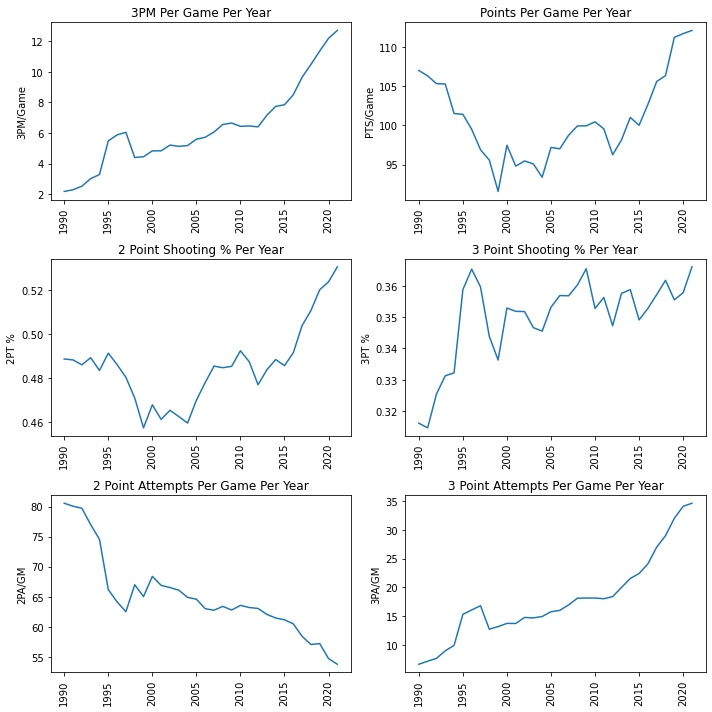

In [70]:
fig, axs = plt.subplots(3, 2, figsize=(10,10))

axs[0,0].plot('Year','3P', data=year_eval)
axs[0,0].tick_params(axis='x', rotation=90)
axs[0,0].title.set_text('3PM Per Game Per Year')
axs[0,0].set_ylabel('3PM/Game')

axs[0,1].plot('Year','PTS', data=year_eval)
axs[0,1].tick_params(axis='x', rotation=90)
axs[0,1].title.set_text('Points Per Game Per Year')
axs[0,1].set_ylabel('PTS/Game')

axs[1,0].plot('Year', '2P%', data=year_eval)
axs[1,0].tick_params(axis='x', rotation=90)
axs[1,0].title.set_text('2 Point Shooting % Per Year')
axs[1,0].set_ylabel('2PT %')

axs[1,1].plot('Year', '3P%', data=year_eval)
axs[1,1].tick_params(axis='x', rotation=90)
axs[1,1].title.set_text('3 Point Shooting % Per Year')
axs[1,1].set_ylabel('3PT %')

axs[2,0].plot('Year', '2PA', data=year_eval)
axs[2,0].tick_params(axis='x', rotation=90)
axs[2,0].title.set_text('2 Point Attempts Per Game Per Year')
axs[2,0].set_ylabel('2PA/GM')

axs[2,1].plot('Year', '3PA', data=year_eval)
axs[2,1].tick_params(axis='x', rotation=90)
axs[2,1].title.set_text('3 Point Attempts Per Game Per Year')
axs[2,1].set_ylabel('3PA/GM')

fig.tight_layout()
plt.show()